#Perceptron

In [1]:
import numpy as np

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
    return X, y

X, y = geradataset(20)
X, y

(array([[0.39656125, 0.22603498],
        [0.50975331, 0.23527419],
        [0.21765788, 0.53004672],
        [0.28305161, 0.56972187],
        [0.77723047, 0.34365496],
        [0.57841154, 0.58089616],
        [0.68117061, 0.96940353],
        [0.17838296, 0.13014426],
        [0.51834444, 0.1763929 ],
        [0.25593051, 0.12953936],
        [0.70092786, 0.29682123],
        [0.56643018, 0.81230332],
        [0.85235675, 0.87605214],
        [0.31278078, 0.53896561],
        [0.25492235, 0.32778607],
        [0.77153207, 0.28195829],
        [0.83662456, 0.32323248],
        [0.50643823, 0.2149646 ],
        [0.04803048, 0.10093066],
        [0.90874945, 0.59635069]]),
 array([ 1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,
         1, -1,  1]))

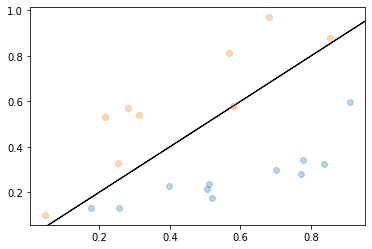

In [2]:
import matplotlib.pyplot as plt

def plotadataset(X, y):
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotadataset(X, y)

def plotavetor(vetor, cor="k"):
    origem = [0,0]
    plt.arrow(*origem, *vetor, color=cor)

vetor = [1, -1]

def perpendicular(vetor):
    perp = np.array(vetor[::-1])
    perp[0] *= -1
    return perp

hiperplano = perpendicular(vetor)

plotavetor(hiperplano)

In [3]:
from sklearn.base import BaseEstimator, ClassifierMixin

class CustoPerceptron():
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(CustoPerceptron.erro(y, ypred), X)

class HingeLoss():
    @staticmethod
    def erro(y, ypred):
        return np.multiply(y, ypred)
    @staticmethod
    def custo(y, ypred):
        return np.sum(1 - HingeLoss.erro(y, ypred))
    @staticmethod
    def gradiente(y, ypred, X):
        marginais = HingeLoss.erro(y, ypred) < 1
        return np.matmul(y[marginais], X[marginais])

class Adaline():
    def __init__(self):
        self.preactivated = True
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum((1 - Adaline.erro(y, ypred))**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(Adaline.erro(y, ypred), X)

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=CustoPerceptron()):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = 0.1
        self.maxiter = 100
        self.custo = custo

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=2)
        for _ in range(self.maxiter):
            if hasattr(self.custo, 'preactivated') and self.custo.preactivated:
                ypred = self.preactivate(X)
            else: 
                ypred = self.predict(X) 
            custo = self.custo.custo(y, ypred)
            print(custo)
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, X)
            if custo==0:
                break
    
    def preactivate(self, X):
        return np.matmul(X, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron(custo=Adaline())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

40.99552041014573
39.74679052978031
37.13590455920546
34.963253340601995
33.111565970087455
31.53546914285986
30.19443490223949
29.053905027238255
28.084363953477443
27.260607300547054
26.5611146069668
25.967513198606756
25.46411990744062
25.037549350948098
24.676379116825782
24.37086359744003
24.112689415302548
23.89476640424893
23.711048986081124
23.556383530688493
23.42637792746526
23.317290142910466
23.22593300706715
23.149592871422062
23.08596012287074
23.033069830759437
22.989251054027406
22.953083549237427
22.923360803049572
22.89905846895848
22.879307421716682
22.863370757092397
22.850624162267508
22.84053916567226
22.83266884643107
22.82663564461511
22.82212096566362
22.818856316930074
22.81661575243156
22.81520943446634
22.814478148619283
22.814288632484978
22.814529598788475
22.815108350977553
22.815947904226554
22.816984537496086
22.81816571315042
22.819448309912616
22.820797122864803
22.82218359097559
22.82358471842363
22.82498216093098
22.826361452543715
22.82771135190494

In [6]:
perceptron = Perceptron(custo=CustoPerceptron())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

36
44
28
44
24
8
0
1.0


In [7]:
perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

22
18
12
6
2
2
0
1.0
